Alejandro Tomas Mackey
A01164338
Ciencia y analítica de datos

Este notebook se basa en información de target
![imagen.png](https://www.america-retail.com/static//2020/12/target01.jpg)


Ahora imagina que somos parte del equipo de data science de la empresa Target, una de las tiendas con mayor presencia en Estados Unidos. El departamento de logistica acude a nosotros para saber donde le conviene poner sus almacenes, para que se optimice el gasto de gasolina, los tiempos de entrega de los productos y se disminuyan costos. Para ello, nos pasan los datos de latitud y longitud de cada una de las tiendas.

https://www.kaggle.com/datasets/saejinmahlauheinert/target-store-locations?select=target-locations.csv

Si quieres saber un poco más de graficas geográficas consulta el siguiente notebook
https://colab.research.google.com/github/QuantEcon/quantecon-notebooks-datascience/blob/master/applications/maps.ipynb#scrollTo=uo2oPtSCeAOz

In [1]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 7.5 MB/s 
     |████████████████████████████████| 1.0 MB 50.8 MB/s 
     |████████████████████████████████| 1.7 MB 63.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 63.2 MB/s 
     |████████████████████████████████| 6.3 MB 53.9 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=00b18ed31f016a86916ca509414141a5f6565e0a7fcdadd15d18464b8f6f1c5f
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=483d672293c41536223039002aa0b260e95680e9dfb19f24fa048ba631372009
  Stored in directory: /root/.

In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas

Importa la base de datos

In [3]:
url="https://raw.githubusercontent.com/marypazrf/bdd/main/target-locations.csv"
df=pd.read_csv(url)

Exploremos los datos.

In [4]:

df.head()


,name,latitude,longitude,address,phone,website
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1839 non-null   object 
 1   latitude   1839 non-null   float64
 2   longitude  1839 non-null   float64
 3   address    1839 non-null   object 
 4   phone      1839 non-null   object 
 5   website    1839 non-null   object 
dtypes: float64(2), object(4)
memory usage: 86.3+ KB


**Definición de Latitud y Longitud**

**Latitud** Es la distancia en grados, minutos y segundos que hay con respecto al paralelo principal, que es el ecuador (0º). La latitud puede ser norte y sur.

**Longitud**: Es la distancia en grados, minutos y segundos que hay con respecto al meridiano principal, que es el meridiano de Greenwich (0º).La longitud puede ser este y oeste.

In [7]:
latlong=df[["latitude","longitude"]]

¡Visualizemos los datos!, para empezar a notar algún patron. 

A simple vista pudieramos pensar que tenemos algunos datos atípicos u outliers, pero .... no es así, simplemente esta grafica no nos está dando toda la información.

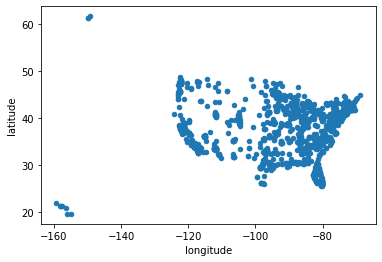

In [8]:
#extrae los datos interesantes
latlong.plot.scatter( "longitude","latitude")

In [9]:
latlong.describe()

,latitude,longitude
count,1839.000000,1839.000000
mean,37.791238,-91.986881
std,5.272299,16.108046
min,19.647855,-159.376962
25%,33.882605,-98.268828
50%,38.955432,-87.746346
75%,41.658341,-80.084833
max,61.577919,-68.742331


Para entender un poco más, nos auxiliaremos de una librería para graficar datos geográficos. Esto nos ayudara a tener un mejor entendimiento de ellos.




In [10]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [11]:
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417369999999 33.2242254)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98977789999999 33.3345501)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593169999999 30.6028747)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.9715595 34.5601477)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.4464222 31.2660613)


In [12]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


In [13]:
#mapa

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [14]:
#graficar el mapa
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

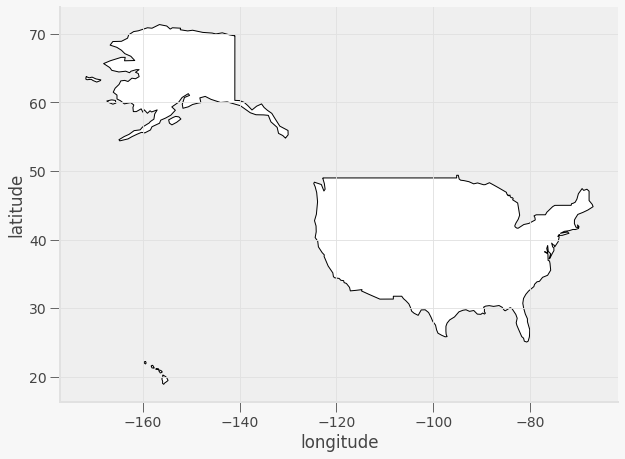

In [15]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'United States of America'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

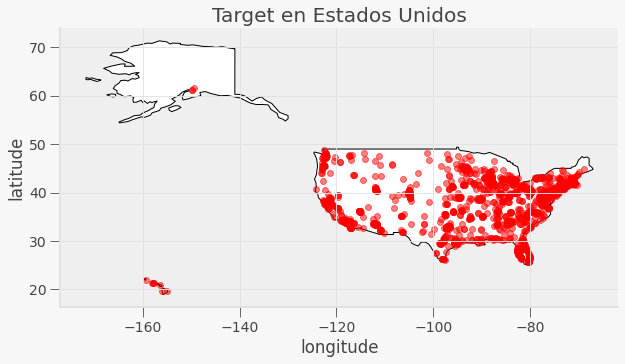

In [16]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

¿qué tal ahora?, tiene mayor sentido verdad, entonces los datos lejanos no eran atípicos, de aquí la importancia de ver los datos con el tipo de gráfica correcta.

Ahora sí, implementa K means a los datos de latitud y longitud :) y encuentra donde colocar los almacenes. 

Nota: si te llama la atención implementar alguna otra visualización con otra librería, lo puedes hacer, no hay restricciones.

In [ ]:
#en este caso cada tienda solo vale por los features de su localizacion
#tenemos que generar y fittear n modelos
#recorrer los modelos, sacar los centroides, sumar las distancias al cuadrado havertinas cluster con centroide
#guardar la suma y graficar
#elegir el codo en la grafica

In [23]:
!pip install haversine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [54]:
from sklearn.cluster import KMeans
from haversine import haversine

In [55]:
modelos=[]
k=10
for i in range(1,k+1):
  kmeanModel = KMeans(n_clusters=i)
  kmeanModel.fit(latlong)
  modelos.append(kmeanModel)

In [56]:
latlong.iloc[[2]]

,latitude,longitude
2,30.602875,-87.895932


In [57]:
modelos[0].cluster_centers_

array([[ 37.79123823, -91.9868805 ]])

In [58]:
totals=[]
means=[]
k=1
for model in modelos:
  print("modelo "+ str(k))
  suma_de_distancias=0
  numero_de_tiendas=0
  s=0
  centroides=model.cluster_centers_
  asignaciones=model.predict(latlong)
  index=0
  for centroide in centroides:
    print("centroide "+ str(index))
    for j in range(len(asignaciones)):
      elemento=latlong.iloc[[j]] # un renglon que tiene latitud y longitud
      asignacion=asignaciones[j] # este debe ser 0,1,2,3...
      if(asignacion==index):
        #sumar la distancia
        distance = haversine((list(elemento["latitude"])[0],list(elemento["longitude"])[0]),(centroide[0],centroide[1]))
        distance_sq=distance**2
        suma_de_distancias+=distance_sq
        s+=distance
        numero_de_tiendas+=1
    index+=1
  totals.append(suma_de_distancias)
  means.append(s/numero_de_tiendas)
  k+=1

  

      




modelo 1
centroide 0
modelo 2
centroide 0
centroide 1
modelo 3
centroide 0
centroide 1
centroide 2
modelo 4
centroide 0
centroide 1
centroide 2
centroide 3
modelo 5
centroide 0
centroide 1
centroide 2
centroide 3
centroide 4
modelo 6
centroide 0
centroide 1
centroide 2
centroide 3
centroide 4
centroide 5
modelo 7
centroide 0
centroide 1
centroide 2
centroide 3
centroide 4
centroide 5
centroide 6
modelo 8
centroide 0
centroide 1
centroide 2
centroide 3
centroide 4
centroide 5
centroide 6
centroide 7
modelo 9
centroide 0
centroide 1
centroide 2
centroide 3
centroide 4
centroide 5
centroide 6
centroide 7
centroide 8
modelo 10
centroide 0
centroide 1
centroide 2
centroide 3
centroide 4
centroide 5
centroide 6
centroide 7
centroide 8
centroide 9


In [59]:
totals

[4261376547.5769663,
 1560946551.5232975,
 1051098459.1995387,
 815164421.6765115,
 600127574.667337,
 476354052.842321,
 357591339.8183266,
 289947624.9557624,
 241066774.21799186,
 215130808.58193535]

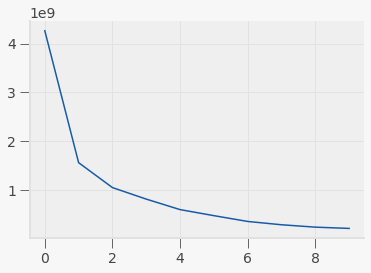

In [60]:
plt.plot(totals)

In [61]:
means

[1324.4449492421195,
 812.8783090709663,
 646.9880897860986,
 545.2045984580201,
 439.016539955286,
 427.52678374061503,
 374.8727031718339,
 343.38352221758083,
 310.3055465163493,
 293.254150018522]

Observamos que conforme añadimos clusters la suma de las distancias al cuadrado de cada punto con su centroide asignado se va disminuyendo cada vez a una velocidad menor, por lo que tomamos el codo de esta función que es un balance entre minimizar distancias y también minimizar costos en construir centros de distribución. El momento en donde la distancia comienza a disminuir significativamente más lento es en el 4. Entonces debe haber 4 centros de distribución.

Encuentra las latitudes y longitudes de los almacenes, ¿qué ciudad es?, ¿a cuantas tiendas va surtir?, ¿sabes a que distancia estará?

Latitudes y longitudes de los almacenes

In [44]:
kmeanModel = KMeans(n_clusters=4)
kmeanModel.fit(latlong)

KMeans(n_clusters=4)

Latitudes y longitudes de los almacenes

In [45]:
kmeanModel.cluster_centers_

array([[  38.4438287 ,  -93.86765315],
       [  37.47251917, -118.72268689],
       [  40.47840906,  -77.02157328],
       [  31.52840694,  -83.25667006]])

In [46]:
predictions=kmeanModel.predict(latlong)

In [49]:
list(predictions).count(0)

580

In [50]:
list(predictions).count(1)

382

In [51]:
list(predictions).count(2)

585

In [52]:
list(predictions).count(3)

292

¿Qué ciudades son?

Honey Creek Township, MO, USA

Atendera 580 tiendas

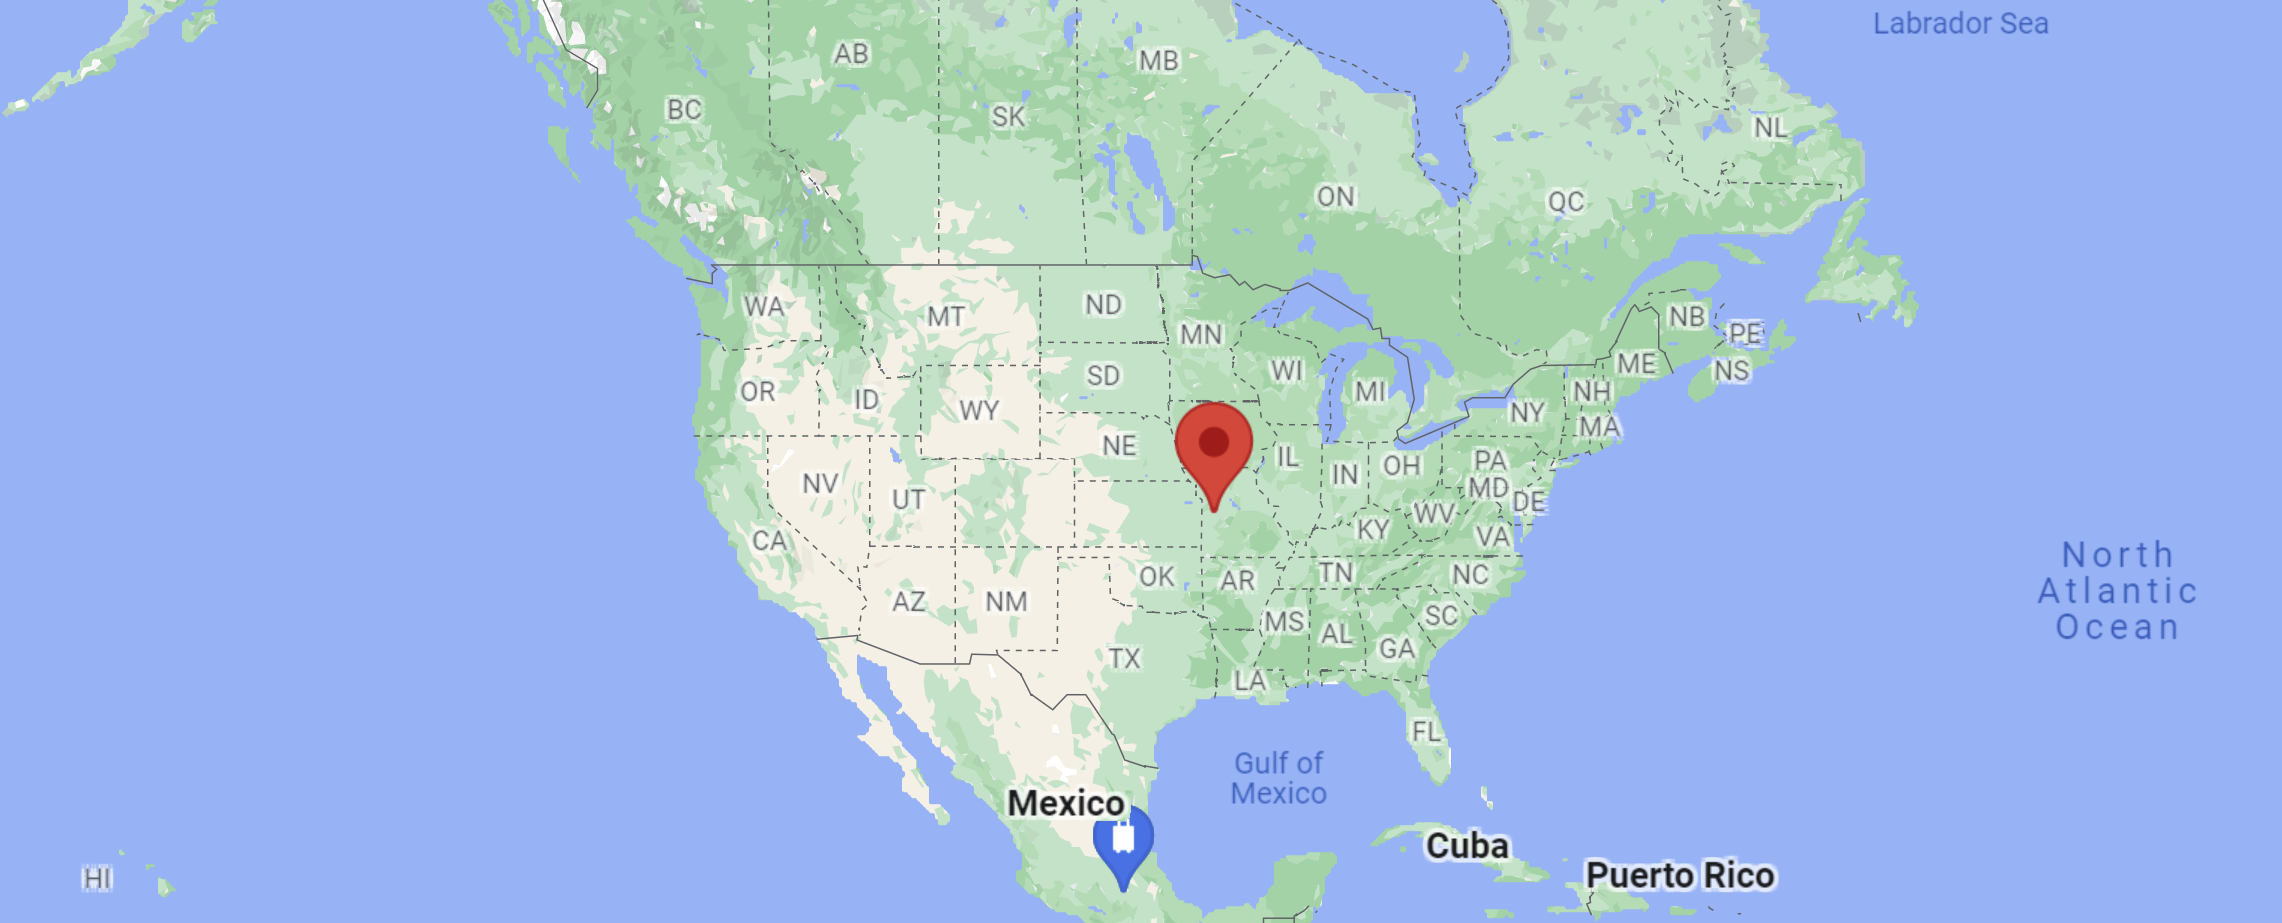

Mono County, CA 93546, USA

Atendera 382 tiendas

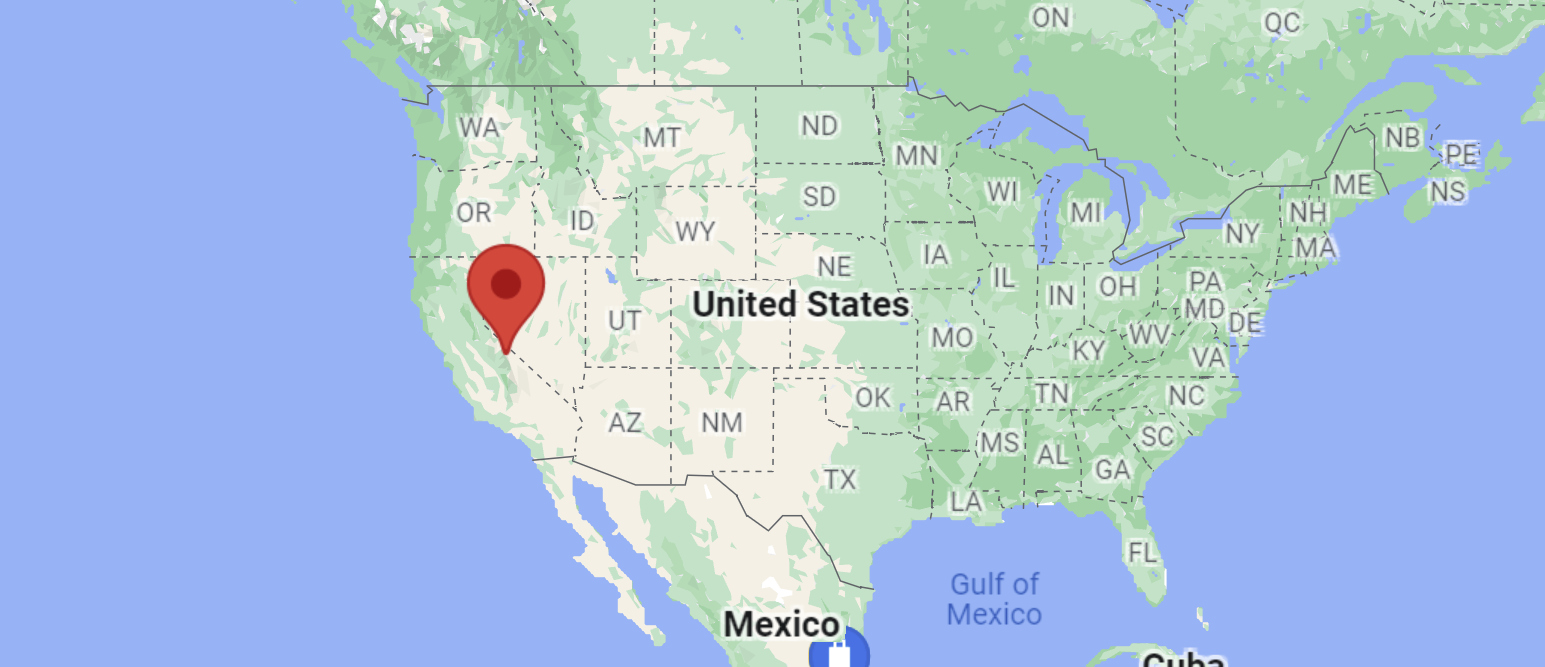

Watts Township, PA 17020, USA

Atendera 585 tiendas

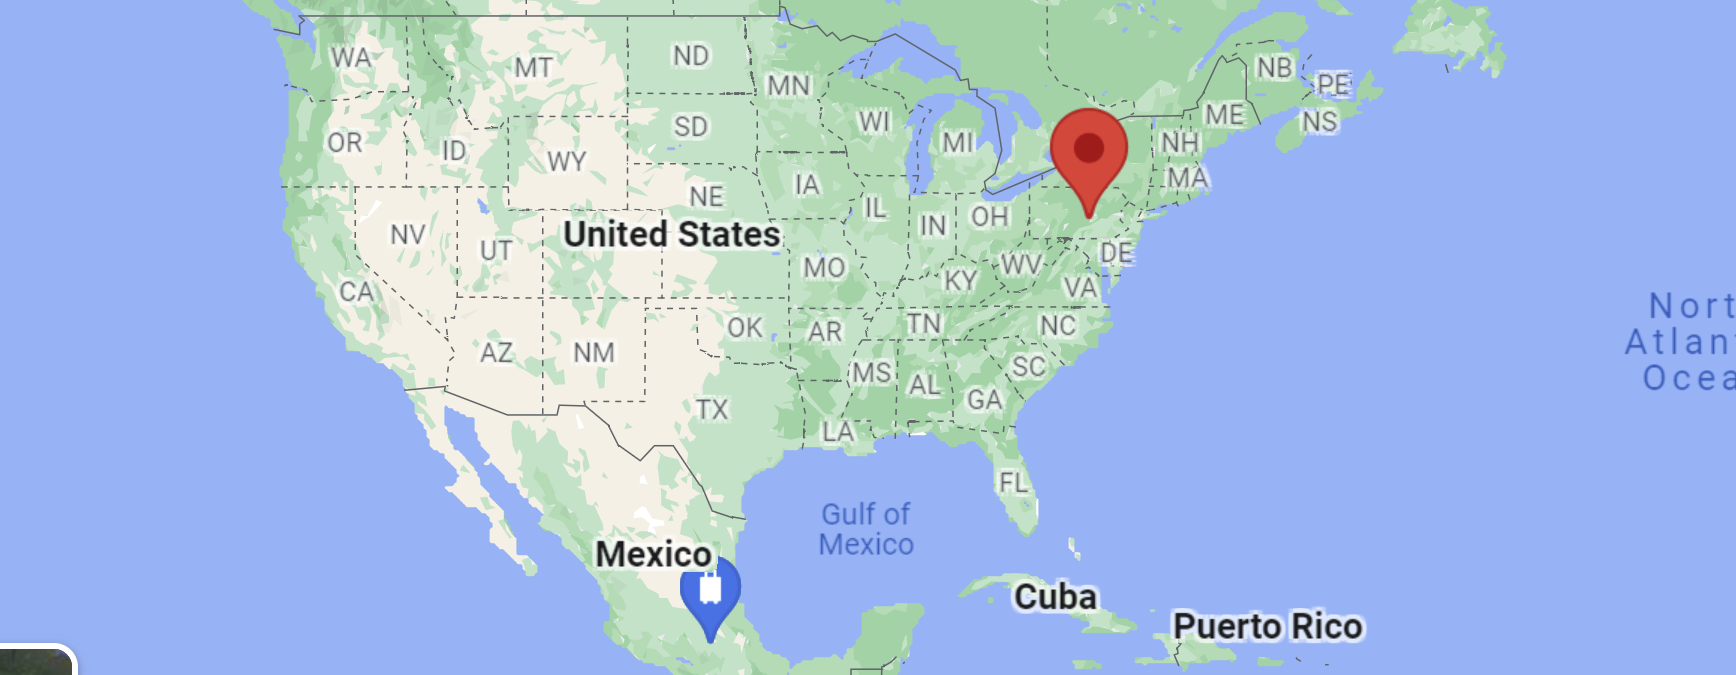

Irwin County, GA, USA

Atendera 292 tiendas

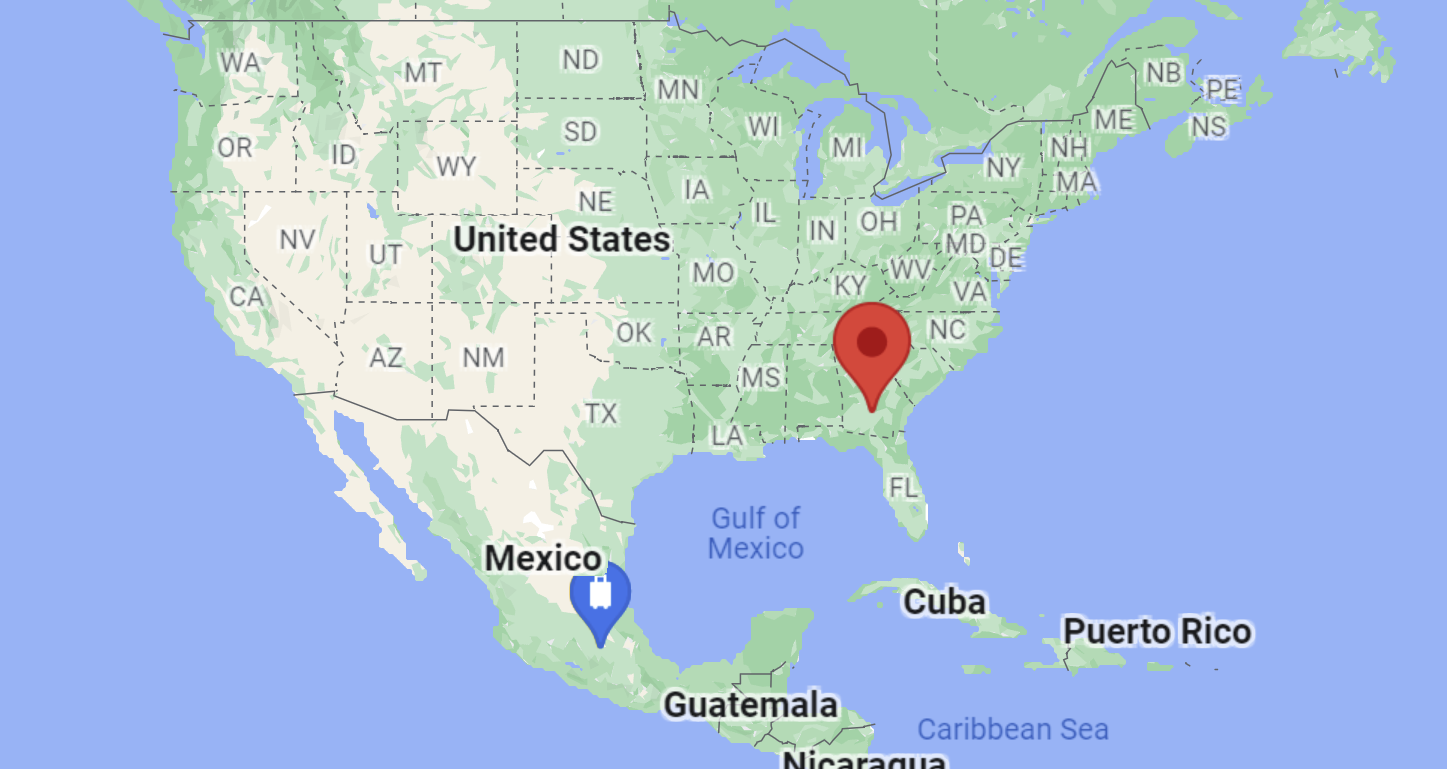

En promedio con esta particion cada centro de distribucion esta a 545 millas de cada tienda

¿qué librerías nos pueden ayudar a graficar este tipo de datos?
¿Consideras importante que se grafique en un mapa?, ¿por qué?
Agrega las conclusiones

Existen muchas librerias que nos pueden ayudar a graficar, por ejemplo está Folium o podriamos usar gmplot para hacer mapas con google maps.

En este caso es importante tener una idea grafica de las ubicaciones porque podemos visualizar las distancias y la distribución de los centros a través del país.

En este experimento intenté hacer hacer la diferencia de distancia euclideana con latitudes y longitudes y no funcionó porque son coordenadas en una esfera. Hubo que transformar usando haversine a una distancia lineal.

También aprendí el método de codo. que proviene de la noción de balancear dos variables en el tope cuando una variable da rendimientos cada vez más pequeños.

No había considerado la opción de k medios para optimizar distancias, pero el caso de uso tiene muchas posibilidades. Sobre todo si usamos pesos en k medios para dar mayor o menor importancia a cada localización, por ejemplo en este caso puede ser usando densidad poblacional.